<a href="https://colab.research.google.com/github/yonseimath/data-science-2022-biginner/blob/feature%2FOne/One/%EB%B3%91%EC%9B%90_%ED%8F%90%EC%97%85_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content")

ValueError: ignored

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("/content/train.csv", thousands = ',')
test = pd.read_csv("/content/test.csv", thousands = ',')
submission_sample = pd.read_csv("/content/submission_sample.csv", thousands = ',')

In [ ]:
train.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2', 'ownerChange'],
      dtype='object')

In [ ]:
def preprocessing_fill_OH (df):
  df_fill = df.fillna({'sido':'missing','instkind':'missing','ownerChange':'missing'})
  df_OH = pd.get_dummies(data = df_fill, columns = ['sido','instkind','ownerChange'])
  return df_OH

In [ ]:
train_df = preprocessing_fill_OH(train)
test_df = preprocessing_fill_OH(test)

In [ ]:
train_x = train_df.drop(columns='OC')
train_y = train_df.OC
test = test_df.drop(columns='OC')

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size =0.3, random_state = 42)

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np
Hgb = HistGradientBoostingClassifier(random_state = 42)
scores = cross_validate(Hgb, train_x, train_y, return_train_score=True)
print("train_score : " + str(np.mean(scores['train_score']))+"\nvalidate_score : "+ str(np.mean(scores['test_score'])))

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


train_score : 1.0
validate_score : 0.9476190476190476


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_x , train_y, return_train_score=True)
print(np.mean(scores['train_score']),np.mean(scores["test_score"]))

1.0 0.9523809523809523


In [ ]:
from lightgbm import LGBMClassifier
lgb =LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_x, train_y,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

1.0 0.9476190476190476


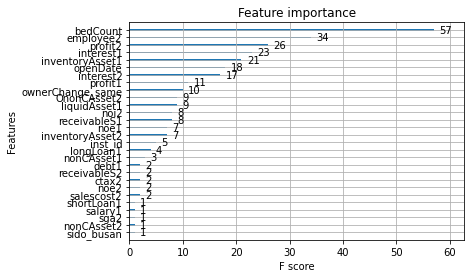

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
xgb.fit(train_x,train_y)
useful_col=[]
for col, imp in zip(train_x.columns, xgb.feature_importances_):
  if imp > 0.025:
    useful_col.append(col)
plot_importance(xgb)
pyplot.show()

In [ ]:
useful_col

['inst_id',
 'openDate',
 'bedCount',
 'noe1',
 'interest1',
 'liquidAsset1',
 'receivableS1',
 'inventoryAsset1',
 'nonCAsset1',
 'shortLoan1',
 'longLoan1',
 'sga2',
 'interest2',
 'profit2',
 'inventoryAsset2',
 'nonCAsset2',
 'OnonCAsset2',
 'employee2',
 'ownerChange_same']

In [ ]:
train_x1 = train_x[useful_col]
val_x1 = val_x[useful_col]
test1 = test[useful_col]

In [ ]:
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_x1 , train_y, return_train_score=True)
print(np.mean(scores['train_score']),np.mean(scores["test_score"]))

1.0 0.9571428571428571


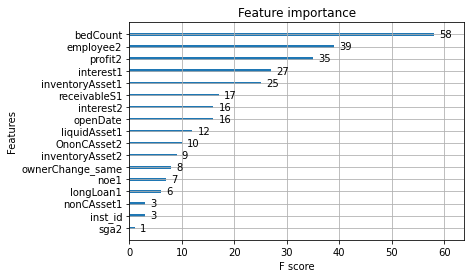

In [ ]:
xgb.fit(train_x1,train_y)
plot_importance(xgb)
pyplot.show()

In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   inst_id           127 non-null    int64  
 1   openDate          126 non-null    float64
 2   bedCount          119 non-null    float64
 3   noe1              125 non-null    float64
 4   interest1         125 non-null    float64
 5   liquidAsset1      125 non-null    float64
 6   receivableS1      125 non-null    float64
 7   inventoryAsset1   125 non-null    float64
 8   nonCAsset1        125 non-null    float64
 9   shortLoan1        125 non-null    float64
 10  longLoan1         125 non-null    float64
 11  sga2              125 non-null    float64
 12  interest2         125 non-null    float64
 13  profit2           125 non-null    float64
 14  inventoryAsset2   125 non-null    float64
 15  nonCAsset2        125 non-null    float64
 16  OnonCAsset2       125 non-null    float64
 1

In [ ]:
predict = xgb.predict(test1)

In [ ]:
np.where(predict=='open',1,0)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
submission=pd.DataFrame({'inst_id': test1.inst_id,
              'OC':np.where(predict=='open',1,0)
              })

In [ ]:
submission

,inst_id,OC
0,2,1
1,5,1
2,6,0
3,8,1
4,10,1
...,...,...
122,424,0
123,425,1
124,429,0
125,430,1


In [ ]:
submission.to_csv("finish.csv",index=False)

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   inst_id  127 non-null    int64
 1   OC       127 non-null    int64
dtypes: int64(2)
memory usage: 2.1 KB


In [ ]:
submission_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   inst_id  127 non-null    int64
 1   OC       127 non-null    int64
dtypes: int64(2)
memory usage: 2.1 KB
